In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive 
drive.mount('/gdrive') # 구글드라이브 연결

Mounted at /gdrive


In [ ]:
!ls
!ls "/gdrive/My Drive/Colab Notebooks/" # 드라이브에 파일 확인

sample_data
'[13] 전이학습 (1).ipynb'			     door.zip
'[13] 전이학습.ipynb'				     resnet34_캐글.ipynb
'[14]CNN이진분류.ipynb'				     TACO2.zip
'[15]ML_캘리포니아집값예측_모형저장까지 (1).ipynb'   TACO.zip
'[15]ML_캘리포니아집값예측_모형저장까지.ipynb'	     Untitled
'[1]SVM-checkpoint.ipynb'			     Untitled0.ipynb
'[1]SVM.ipynb'					    'Untitled (1)'
'[25-2]U-NET(모델적용)_최유리.ipynb'		    'Untitled1 (1).ipynb'
'[25-2]U-NET(모델적용)_최유리.ipynb의 사본'	     Untitled1.ipynb
'[25]U-NET02_model.ipynb'			     Untitled2.ipynb
'[8]CNN활용.ipynb'				     Untitled3.ipynb
 aihubsmall.zip					     Untitled4.ipynb
 aihub.zip					     Untitled5.ipynb
 car.zip					     Untitled6.ipynb
 dataset.zip					     yolo_car.ipynb
 DCGAN.ipynb					     yolo_unfin.ipynb
 DL						     YOLOv5s.ipynb


In [ ]:
import zipfile as zf
files = zf.ZipFile("/gdrive/My Drive/Colab Notebooks/aihubsmall.zip",'r') # 압축 파일의 자료 읽기
files.extractall()
files.close()

In [ ]:
# 한글이 모두 깨져서 폴더명 영어로 변경..
train_dir = os.path.join('dataset/')
labels = os.listdir(os.path.join(os.getcwd(), "dataset")) # 항목이름 리스트 반환

In [ ]:
labels

['can', 'vinyl', 'plastic']

In [ ]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "can":	 1240
Images of label "vinyl":	 600
Images of label "plastic":	 555


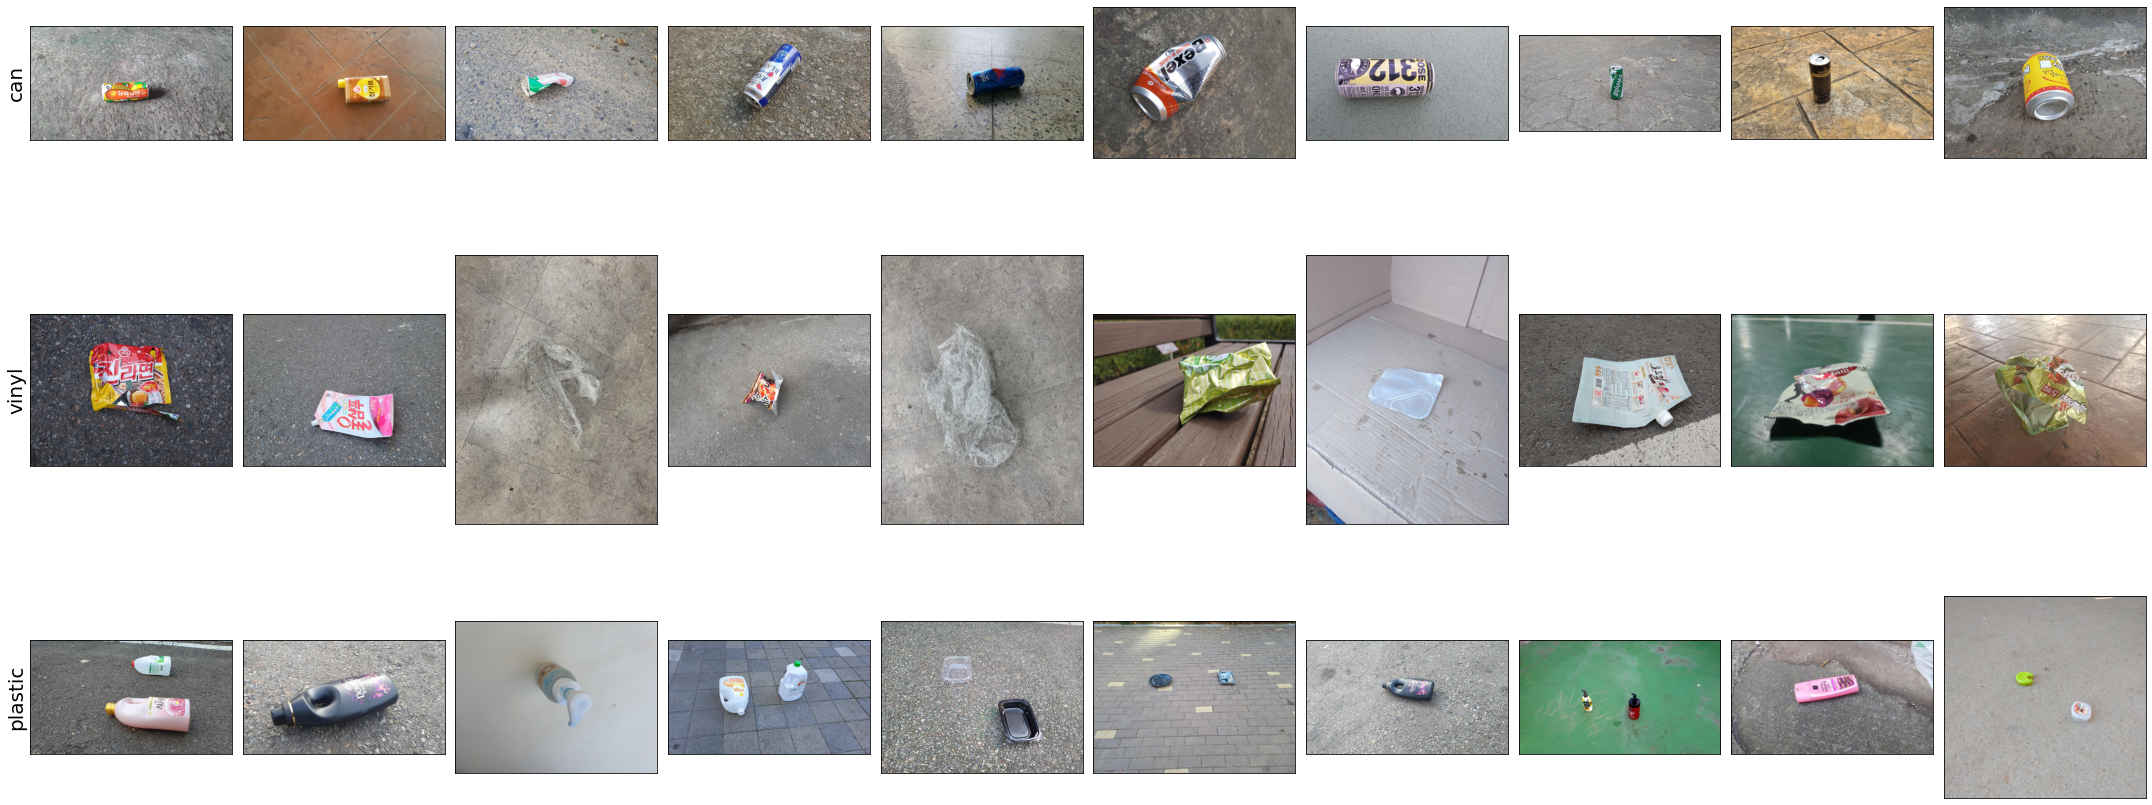

In [ ]:
plt.figure(figsize=(30,14))

for i in range(3):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(3, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
# 사이즈 확인해보기

directory = os.path.join(train_dir, 'can')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape # 사이즈가 너무 크다..

(1080, 1920, 3)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 510, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 382, 510, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 380, 508, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 380, 508, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 190, 254, 32)     0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True, # ImageDataGenerator 클래스로 이미지 증강(augment)
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 1916 images belonging to 3 classes.
Found 478 images belonging to 3 classes.


In [ ]:
# 정확도가 높으면 훈련 종료

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(train_generator, epochs=15, verbose=1, validation_data=validation_generator, callbacks=[callbacks])
# gpu로 학습시간 55분 나왔음 

Epoch 1/15
60/60 [==============================] - 268s 4s/step - loss: 2.2265 - accuracy: 0.3403 - val_loss: 3.7445 - val_accuracy: 0.2218
Epoch 2/15
60/60 [==============================] - 233s 4s/step - loss: 1.5080 - accuracy: 0.4755 - val_loss: 6.5119 - val_accuracy: 0.2322
Epoch 3/15
60/60 [==============================] - 234s 4s/step - loss: 1.2723 - accuracy: 0.5318 - val_loss: 2.8309 - val_accuracy: 0.2469
Epoch 4/15
60/60 [==============================] - 232s 4s/step - loss: 1.1783 - accuracy: 0.5444 - val_loss: 2.9112 - val_accuracy: 0.2322
Epoch 5/15
60/60 [==============================] - 234s 4s/step - loss: 1.0845 - accuracy: 0.5663 - val_loss: 1.3653 - val_accuracy: 0.3410
Epoch 6/15
60/60 [==============================] - 235s 4s/step - loss: 0.9885 - accuracy: 0.5892 - val_loss: 1.2240 - val_accuracy: 0.4937
Epoch 7/15
60/60 [==============================] - 237s 4s/step - loss: 0.9800 - accuracy: 0.5981 - val_loss: 1.3819 - val_accuracy: 0.4372
Epoch 8/15
60

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()